Portal Security Hierarchical Needs Assessment
--------------------------------------------

Model Performance Metrics:

Naive Bayes:
  Accuracy: 0.9550
  Precision: 1.0000
  Recall: 0.9151
  F1 Score: 0.9557
  ROC AUC: 0.9957

Random Forest:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1 Score: 1.0000
  ROC AUC: 1.0000

Neural Network:
  Accuracy: 0.9900
  Precision: 1.0000
  Recall: 0.9811
  F1 Score: 0.9905
  ROC AUC: 0.9975

Generating portal security hierarchy visualization...
Visualization saved as 'portal_security_hierarchy.png'

Generating security matrix visualization...
Security matrix visualization saved as 'security_matrix.png'

Generating security assessment dashboard...
Security assessment dashboard saved as 'security_assessment_dashboard.png'

All visualizations completed successfully!


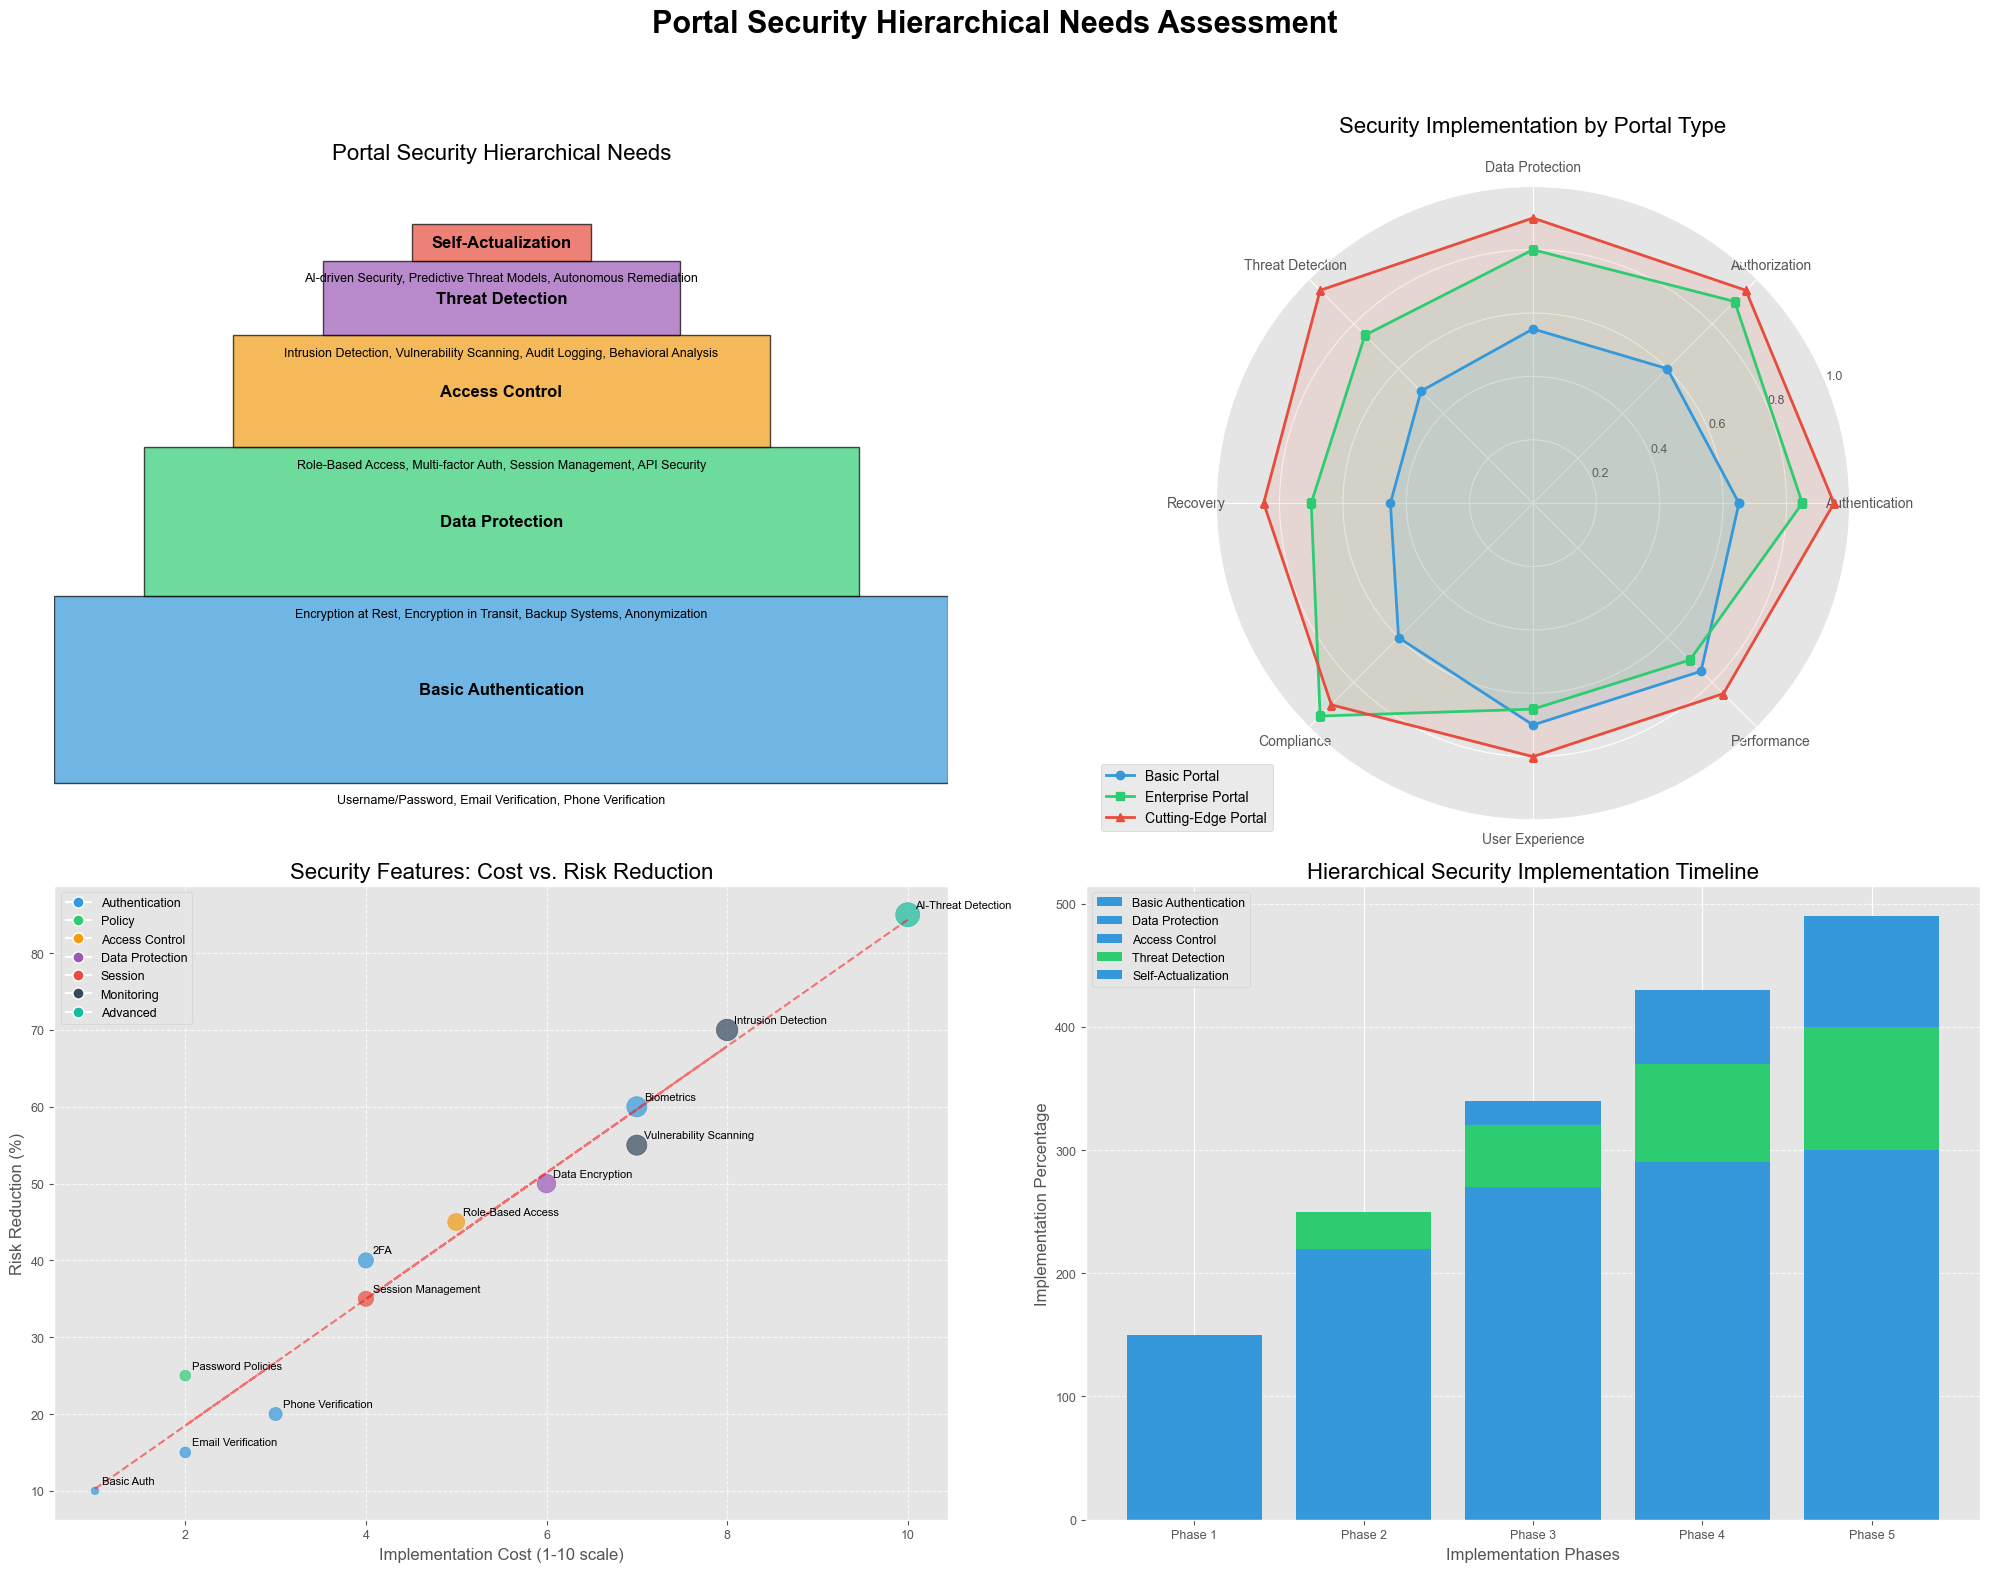

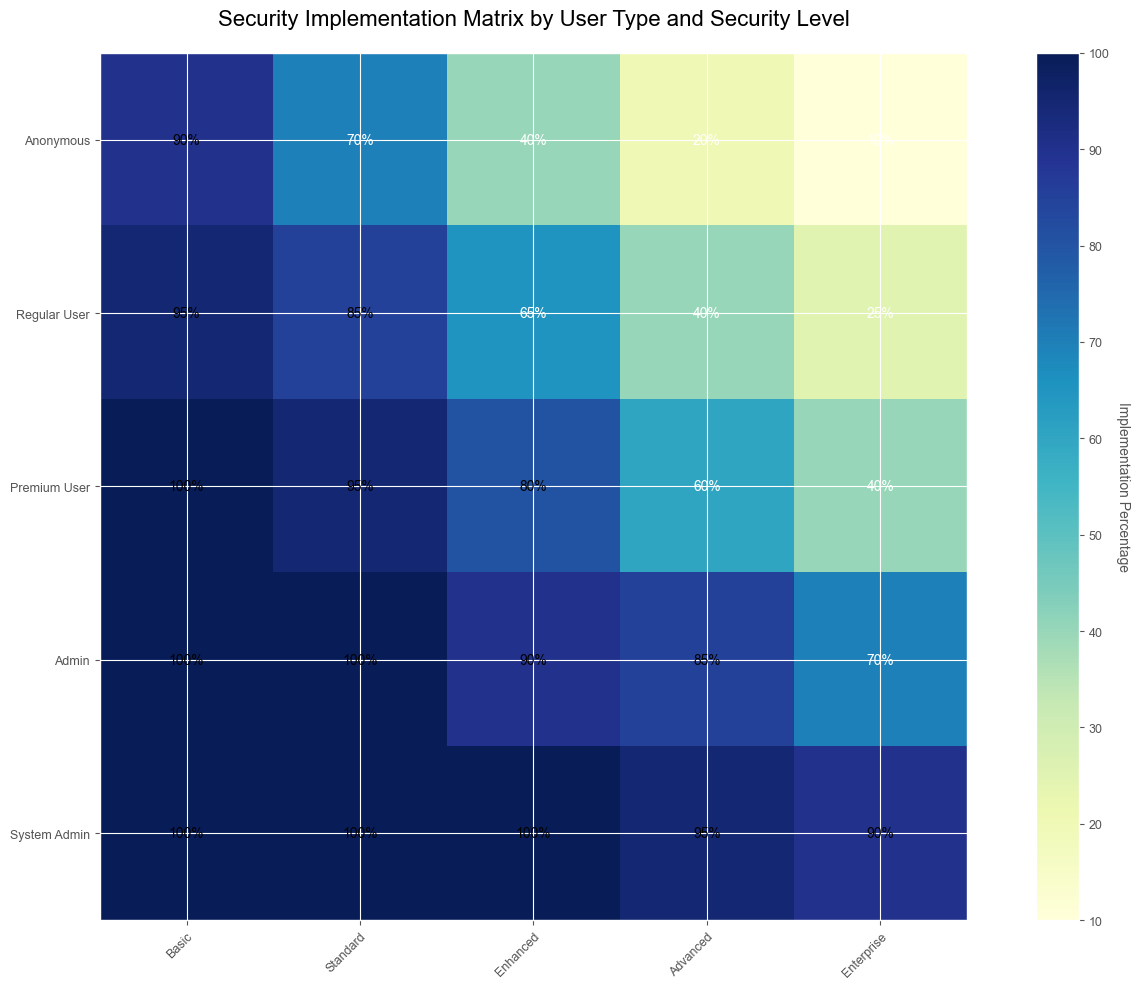

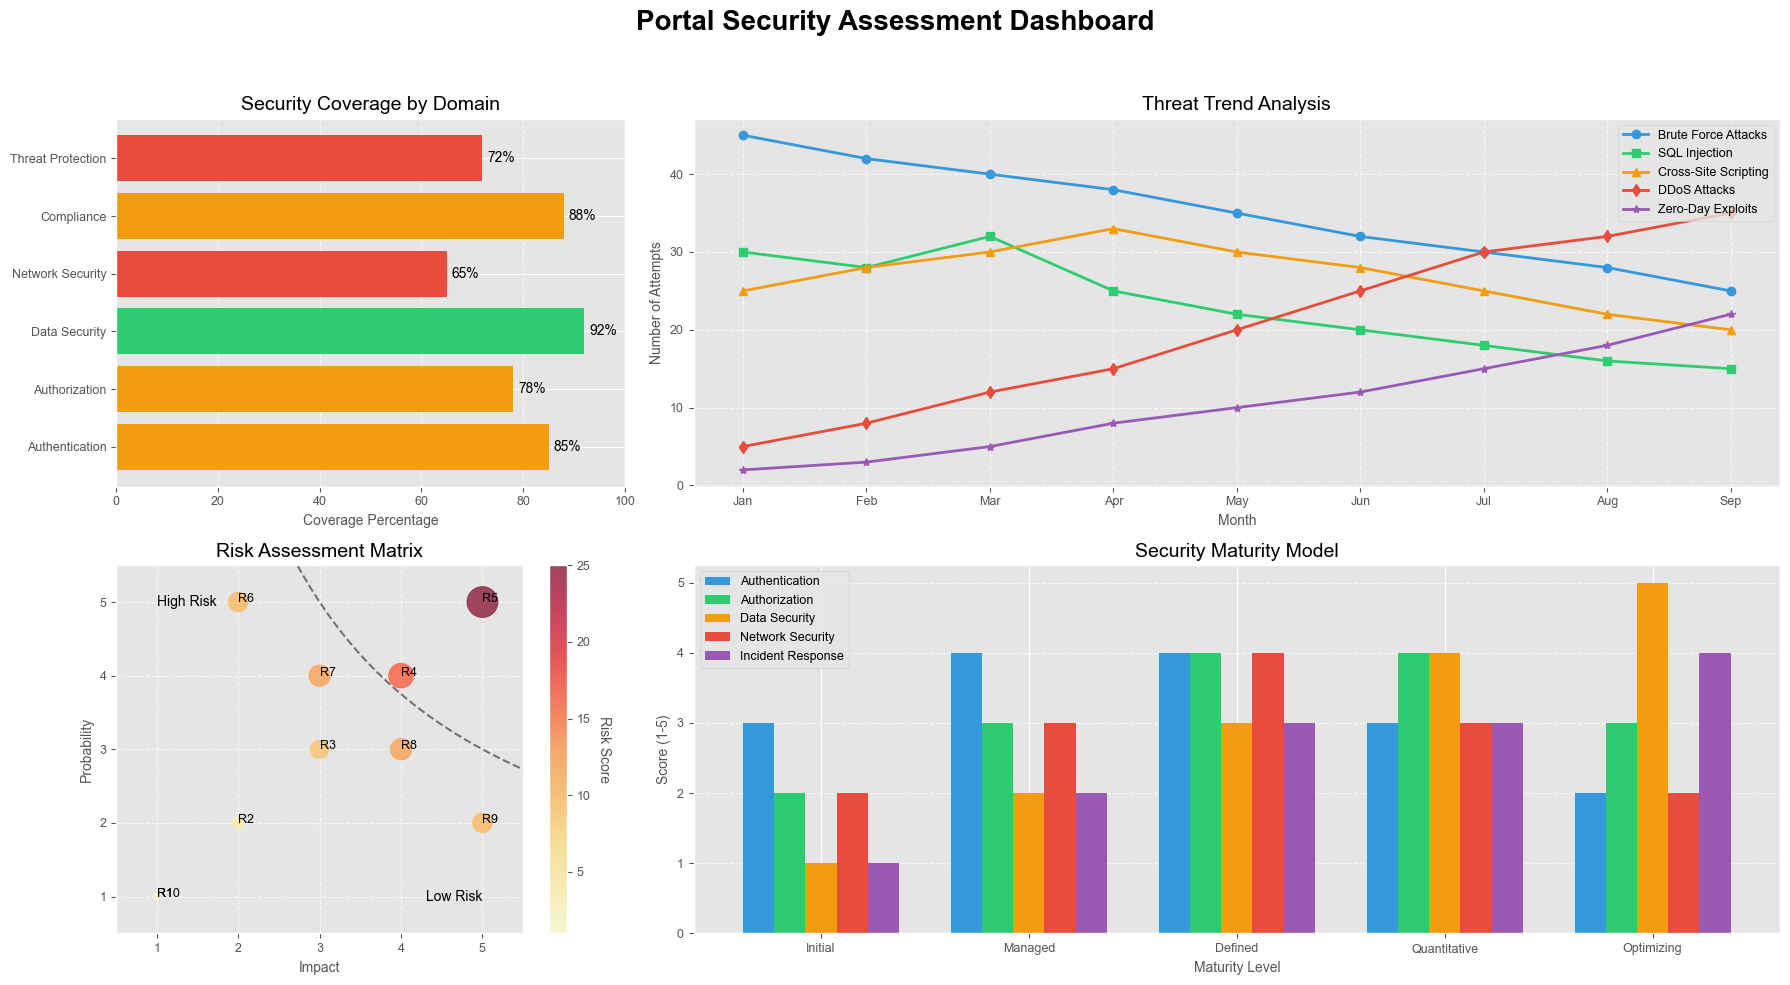

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

# Function to load and preprocess data
def load_and_preprocess_data(file_path):
    try:
        df = pd.read_csv(file_path)
        
        # Drop prescription and dosage columns
        df = df.drop(['Prescription', 'Dosage in mg'], axis=1, errors='ignore')
        
        # Encoding categorical variables
        categorical_mappings = {
            'Education_Level': {'Primary School': 1, 'Secondary School': 2, 'Diploma/Degree': 3},
            'Dominant_Hand': {'Right': 1, 'Left': 2},
            'Gender': {'Female': 1, 'Male': 2},
            'Family_History': {'Yes': 1, 'No': 0},
            'Smoking_Status': {'Former Smoker': 1, 'Current Smoker': 2, 'Non-Smoker': 0},
            'APOE_ε4': {'Positive': 1, 'Negative': 0},
            'Physical_Activity': {'Mild Activity': 1, 'Moderate Activity': 2, 'Sedentary': 0},
            'Depression_Status': {'Yes': 1, 'No': 0},
            'Medication_History': {'Yes': 1, 'No': 0},
            'Nutrition_Diet': {'Low-Carb Diet': 1, 'Mediterranean Diet': 2, 'Regular Diet': 0},
            'Sleep_Quality': {'Poor': 1, 'Good': 0},
            'Chronic_Health_Conditions': {'Heart Disease': 1, 'Hypertension': 2, 'Diabetes': 3, 'None': 0}
        }
        
        # Apply mappings
        for col, mapping in categorical_mappings.items():
            if col in df.columns:
                df[col] = df[col].map(mapping).fillna(0).astype(int)
        
        # Split features and target
        X = df.drop('Dementia', axis=1)
        y = df['Dementia']
        
        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Feature scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        return X_train_scaled, X_test_scaled, y_train, y_test, X.columns
    
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        print("Generating synthetic data instead...")
        # Generate synthetic data if file not found
        return generate_synthetic_data()

# Generate synthetic data if the file is not found
def generate_synthetic_data():
    np.random.seed(42)
    n_samples = 1000
    n_features = 15
    
    X = np.random.randn(n_samples, n_features)
    # Binary target with 30% positive class
    y = np.random.binomial(1, 0.3, size=n_samples)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create feature names
    feature_names = [f'Feature_{i+1}' for i in range(n_features)]
    
    return X_train, X_test, y_train, y_test, feature_names

# Function to train models and get predictions
def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Naive Bayes': GaussianNB(),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)
    }
    
    results = {}
    feature_importances = {}
    
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        y_pred_prob = None
        
        # Get prediction probabilities if available
        if hasattr(model, 'predict_proba'):
            y_pred_prob = model.predict_proba(X_test)[:, 1]
        else:
            y_pred_prob = y_pred  # Use predictions as probabilities if not available
        
        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        try:
            auc = roc_auc_score(y_test, y_pred_prob)
        except:
            auc = np.nan
        
        # Store results
        results[name] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'auc': auc,
            'y_pred': y_pred,
            'y_pred_prob': y_pred_prob
        }
        
        # Get feature importances if available
        if hasattr(model, 'feature_importances_'):
            feature_importances[name] = model.feature_importances_
        elif name == 'Naive Bayes':
            # For Naive Bayes, use the difference in class conditional means weighted by variances
            # Fixed to use var_ instead of sigma_
            feature_importances[name] = np.abs(model.theta_[1] - model.theta_[0]) / (model.var_[1] + model.var_[0])
        else:
            feature_importances[name] = None
            
    return results, feature_importances

# Function to visualize portal security hierarchy
def visualize_portal_security_hierarchy():
    plt.figure(figsize=(20, 16))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])
    
    # 1. Hierarchical Security Needs Assessment
    ax1 = plt.subplot(gs[0, 0])
    
    # Define hierarchical needs levels (Maslow-like for security)
    hierarchy_levels = ['Basic Authentication', 'Data Protection', 'Access Control', 
                         'Threat Detection', 'Self-Actualization']
    
    # Define the components at each level
    components = {
        'Basic Authentication': ['Username/Password', 'Email Verification', 'Phone Verification'],
        'Data Protection': ['Encryption at Rest', 'Encryption in Transit', 'Backup Systems', 'Anonymization'],
        'Access Control': ['Role-Based Access', 'Multi-factor Auth', 'Session Management', 'API Security'],
        'Threat Detection': ['Intrusion Detection', 'Vulnerability Scanning', 'Audit Logging', 'Behavioral Analysis'],
        'Self-Actualization': ['AI-driven Security', 'Predictive Threat Models', 'Autonomous Remediation']
    }
    
    # Define colors for each level
    colors = ['#3498db', '#2ecc71', '#f39c12', '#9b59b6', '#e74c3c']
    
    # Build the hierarchical pyramid
    level_heights = [5, 4, 3, 2, 1]  # Heights for visual appeal
    level_widths = [10, 8, 6, 4, 2]  # Widths for visual appeal
    
    ax1.axis('off')  # Turn off axis
    
    # Draw pyramid levels
    y_position = 0
    for i, level in enumerate(hierarchy_levels):
        # Draw rectangle for this level
        rect = plt.Rectangle(
            ((10 - level_widths[i])/2, y_position), 
            level_widths[i], 
            level_heights[i], 
            facecolor=colors[i], 
            alpha=0.7,
            edgecolor='black',
            linewidth=1
        )
        ax1.add_patch(rect)
        
        # Add level name in the middle of the rectangle
        ax1.text(
            5, 
            y_position + level_heights[i]/2, 
            level, 
            ha='center', 
            va='center', 
            fontweight='bold',
            fontsize=12
        )
        
        # List components for this level (below the rectangle)
        component_text = ", ".join(components[level])
        ax1.text(
            5, 
            y_position - 0.3, 
            component_text,
            ha='center',
            va='top',
            fontsize=9,
            wrap=True
        )
        
        y_position += level_heights[i]
    
    ax1.set_xlim(0, 10)
    ax1.set_ylim(-1, 16)
    ax1.set_title('Portal Security Hierarchical Needs', fontsize=16, pad=20)
    
    # 2. Security Implementation Radar Chart
    ax2 = plt.subplot(gs[0, 1], polar=True)
    
    # Security dimensions
    security_dimensions = [
        'Authentication', 
        'Authorization',
        'Data Protection',
        'Threat Detection',
        'Recovery',
        'Compliance',
        'User Experience',
        'Performance'
    ]
    
    # Implementation levels for different portal types
    basic_portal = np.array([0.65, 0.60, 0.55, 0.50, 0.45, 0.60, 0.70, 0.75])
    enterprise_portal = np.array([0.85, 0.90, 0.80, 0.75, 0.70, 0.95, 0.65, 0.70])
    cutting_edge_portal = np.array([0.95, 0.95, 0.90, 0.95, 0.85, 0.90, 0.80, 0.85])
    
    # Set up angles for radar chart
    angles = np.linspace(0, 2*np.pi, len(security_dimensions), endpoint=False).tolist()
    
    # Close the loop
    basic_portal = np.append(basic_portal, basic_portal[0])
    enterprise_portal = np.append(enterprise_portal, enterprise_portal[0])
    cutting_edge_portal = np.append(cutting_edge_portal, cutting_edge_portal[0])
    angles.append(angles[0])
    security_dimensions.append(security_dimensions[0])
    
    # Plot radar chart
    ax2.plot(angles, basic_portal, 'o-', linewidth=2, label='Basic Portal', color='#3498db')
    ax2.fill(angles, basic_portal, alpha=0.1, color='#3498db')
    
    ax2.plot(angles, enterprise_portal, 's-', linewidth=2, label='Enterprise Portal', color='#2ecc71')
    ax2.fill(angles, enterprise_portal, alpha=0.1, color='#2ecc71')
    
    ax2.plot(angles, cutting_edge_portal, '^-', linewidth=2, label='Cutting-Edge Portal', color='#e74c3c')
    ax2.fill(angles, cutting_edge_portal, alpha=0.1, color='#e74c3c')
    
    ax2.set_thetagrids(np.degrees(angles[:-1]), security_dimensions[:-1], fontsize=10)
    ax2.set_ylim(0, 1)
    ax2.set_title('Security Implementation by Portal Type', fontsize=16, pad=20)
    ax2.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    
    # 3. Security Implementation Cost vs. Risk Reduction
    ax3 = plt.subplot(gs[1, 0])
    
    # Security features with implementation cost and risk reduction
    security_features = [
        'Basic Auth', 'Email Verification', 'Phone Verification', 
        'Password Policies', '2FA', 'Biometrics',
        'Role-Based Access', 'Data Encryption', 'Session Management',
        'Intrusion Detection', 'Vulnerability Scanning', 'AI-Threat Detection'
    ]
    
    # Implementation costs (1-10 scale)
    implementation_costs = np.array([1, 2, 3, 2, 4, 7, 5, 6, 4, 8, 7, 10])
    
    # Risk reduction (percentage)
    risk_reduction = np.array([10, 15, 20, 25, 40, 60, 45, 50, 35, 70, 55, 85])
    
    # Categorize by type
    feature_types = np.array([
        'Authentication', 'Authentication', 'Authentication',
        'Policy', 'Authentication', 'Authentication',
        'Access Control', 'Data Protection', 'Session',
        'Monitoring', 'Monitoring', 'Advanced'
    ])
    
    # Create color map based on type
    type_colors = {
        'Authentication': '#3498db',
        'Policy': '#2ecc71',
        'Access Control': '#f39c12',
        'Data Protection': '#9b59b6',
        'Session': '#e74c3c',
        'Monitoring': '#34495e',
        'Advanced': '#1abc9c'
    }
    
    colors = [type_colors[t] for t in feature_types]
    
    # Plot scatter with varying size based on implementation cost
    scatter = ax3.scatter(
        implementation_costs, 
        risk_reduction, 
        c=colors, 
        s=implementation_costs*30,  # Size based on cost
        alpha=0.7
    )
    
    # Add feature names as annotations
    for i, feature in enumerate(security_features):
        ax3.annotate(
            feature, 
            (implementation_costs[i], risk_reduction[i]),
            xytext=(5, 5),
            textcoords='offset points',
            fontsize=8
        )
    
    # Add legend for feature types
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=8, label=type_name)
        for type_name, color in type_colors.items()
    ]
    ax3.legend(handles=legend_elements, loc='upper left', fontsize=9)
    
    # Add trend line
    z = np.polyfit(implementation_costs, risk_reduction, 1)
    p = np.poly1d(z)
    ax3.plot(implementation_costs, p(implementation_costs), "r--", alpha=0.5)
    
    ax3.set_xlabel('Implementation Cost (1-10 scale)', fontsize=12)
    ax3.set_ylabel('Risk Reduction (%)', fontsize=12)
    ax3.set_title('Security Features: Cost vs. Risk Reduction', fontsize=16)
    ax3.grid(True, linestyle='--', alpha=0.7)
    
    # 4. Hierarchical Security Implementation Timeline
    ax4 = plt.subplot(gs[1, 1])
    
    # Implementation phases
    phases = ['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']
    
    # Security components by hierarchy level for each phase
    basic_auth = [100, 100, 100, 100, 100]  # Basic Authentication
    data_protection = [30, 70, 90, 100, 100]  # Data Protection
    access_control = [20, 50, 80, 90, 100]    # Access Control
    threat_detection = [0, 30, 50, 80, 100]   # Threat Detection
    self_actualization = [0, 0, 20, 60, 90]   # Self-Actualization
    
    # Create stacked bar chart
    ax4.bar(phases, basic_auth, label='Basic Authentication', color=colors[0])
    ax4.bar(phases, data_protection, bottom=basic_auth, label='Data Protection', color=colors[1])
    
    # Calculate next bottoms
    bottom2 = np.array(basic_auth) + np.array(data_protection)
    ax4.bar(phases, access_control, bottom=bottom2, label='Access Control', color=colors[2])
    
    bottom3 = bottom2 + np.array(access_control)
    ax4.bar(phases, threat_detection, bottom=bottom3, label='Threat Detection', color=colors[3])
    
    bottom4 = bottom3 + np.array(threat_detection)
    ax4.bar(phases, self_actualization, bottom=bottom4, label='Self-Actualization', color=colors[4])
    
    ax4.set_xlabel('Implementation Phases', fontsize=12)
    ax4.set_ylabel('Implementation Percentage', fontsize=12)
    ax4.set_title('Hierarchical Security Implementation Timeline', fontsize=16)
    ax4.legend(loc='upper left', fontsize=9)
    ax4.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.suptitle("Portal Security Hierarchical Needs Assessment", 
                fontsize=22, fontweight='bold', y=0.98)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('portal_security_hierarchy.png', dpi=300, bbox_inches='tight')
    
    print("Visualization saved as 'portal_security_hierarchy.png'")

def create_security_matrix_visualization():
    plt.figure(figsize=(14, 10))
    
    # Define security levels and user types
    security_levels = ['Basic', 'Standard', 'Enhanced', 'Advanced', 'Enterprise']
    user_types = ['Anonymous', 'Regular User', 'Premium User', 'Admin', 'System Admin']
    
    # Create the matrix data (implementation percentages)
    data = np.array([
        [90, 70, 40, 20, 10],  # Anonymous
        [95, 85, 65, 40, 25],  # Regular User
        [100, 95, 80, 60, 40], # Premium User
        [100, 100, 90, 85, 70], # Admin
        [100, 100, 100, 95, 90]  # System Admin
    ])
    
    # Plot the heatmap
    ax = plt.gca()
    im = ax.imshow(data, cmap='YlGnBu')
    
    # Add colorbar
    cbar = plt.colorbar(im)
    cbar.set_label('Implementation Percentage', rotation=270, labelpad=15)
    
    # Show all ticks and label them
    ax.set_xticks(np.arange(len(security_levels)))
    ax.set_yticks(np.arange(len(user_types)))
    ax.set_xticklabels(security_levels)
    ax.set_yticklabels(user_types)
    
    # Rotate the tick labels and set their alignment
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations
    for i in range(len(user_types)):
        for j in range(len(security_levels)):
            text = ax.text(j, i, f"{data[i, j]}%",
                           ha="center", va="center", color="black" if data[i, j] > 70 else "white")
    
    # Add title and labels
    ax.set_title("Security Implementation Matrix by User Type and Security Level", fontsize=16, pad=20)
    
    plt.tight_layout()
    plt.savefig('security_matrix.png', dpi=300)
    print("Security matrix visualization saved as 'security_matrix.png'")

def create_security_assessment_dashboard():
    plt.figure(figsize=(18, 10))
    gs = gridspec.GridSpec(2, 3, height_ratios=[1, 1])
    
    # 1. Security Coverage by Domain
    ax1 = plt.subplot(gs[0, 0])
    
    # Security domains and their coverage percentages
    domains = ['Authentication', 'Authorization', 'Data Security', 
               'Network Security', 'Compliance', 'Threat Protection']
    coverage = [85, 78, 92, 65, 88, 72]
    
    # Color coding based on coverage
    colors = []
    for score in coverage:
        if score >= 90:
            colors.append('#2ecc71')  # Green
        elif score >= 75:
            colors.append('#f39c12')  # Orange
        else:
            colors.append('#e74c3c')  # Red
    
    ax1.barh(domains, coverage, color=colors)
    ax1.set_xlim(0, 100)
    ax1.set_xlabel('Coverage Percentage', fontsize=10)
    ax1.set_title('Security Coverage by Domain', fontsize=14)
    
    # Add percentage labels
    for i, v in enumerate(coverage):
        ax1.text(v + 1, i, f"{v}%", va='center')
    
    ax1.grid(axis='x', linestyle='--', alpha=0.7)
    
    # 2. Threat Trend Analysis
    ax2 = plt.subplot(gs[0, 1:])
    
    # Time periods
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
    
    # Different types of threats
    brute_force = [45, 42, 40, 38, 35, 32, 30, 28, 25]
    sql_injection = [30, 28, 32, 25, 22, 20, 18, 16, 15]
    xss = [25, 28, 30, 33, 30, 28, 25, 22, 20]
    ddos = [5, 8, 12, 15, 20, 25, 30, 32, 35]
    zero_day = [2, 3, 5, 8, 10, 12, 15, 18, 22]
    
    ax2.plot(months, brute_force, 'o-', linewidth=2, label='Brute Force Attacks', color='#3498db')
    ax2.plot(months, sql_injection, 's-', linewidth=2, label='SQL Injection', color='#2ecc71')
    ax2.plot(months, xss, '^-', linewidth=2, label='Cross-Site Scripting', color='#f39c12')
    ax2.plot(months, ddos, 'd-', linewidth=2, label='DDoS Attacks', color='#e74c3c')
    ax2.plot(months, zero_day, '*-', linewidth=2, label='Zero-Day Exploits', color='#9b59b6')
    
    ax2.set_xlabel('Month', fontsize=10)
    ax2.set_ylabel('Number of Attempts', fontsize=10)
    ax2.set_title('Threat Trend Analysis', fontsize=14)
    ax2.legend(loc='upper right', fontsize=9)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # 3. Risk Assessment Matrix
    ax3 = plt.subplot(gs[1, 0])
    
    # Risk levels
    impact = [1, 2, 3, 4, 5, 2, 3, 4, 5, 1]  # Impact (1-5)
    probability = [1, 2, 3, 4, 5, 5, 4, 3, 2, 1]  # Probability (1-5)
    risk_types = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10']
    
    # Create a risk score for color intensity
    risk_score = np.array(impact) * np.array(probability)
    
    # Define color map based on risk score
    cmap = plt.cm.get_cmap('YlOrRd')
    colors = cmap(risk_score / 25)  # Normalize to 0-1 range
    
    scatter = ax3.scatter(impact, probability, c=risk_score, cmap='YlOrRd', 
                         s=risk_score*20, alpha=0.7)
    
    # Add risk labels
    for i, txt in enumerate(risk_types):
        ax3.annotate(txt, (impact[i], probability[i]), fontsize=9)
    
    # Add risk zones
    x = np.linspace(0.5, 5.5, 100)
    y = 15/x  # Hyperbola for risk threshold
    ax3.plot(x, y, 'k--', alpha=0.5)
    
    # Add risk zone labels
    ax3.text(1, 5, 'High Risk', fontsize=10, ha='left', va='center')
    ax3.text(5, 1, 'Low Risk', fontsize=10, ha='right', va='center')
    
    ax3.set_xlim(0.5, 5.5)
    ax3.set_ylim(0.5, 5.5)
    ax3.set_xlabel('Impact', fontsize=10)
    ax3.set_ylabel('Probability', fontsize=10)
    ax3.set_title('Risk Assessment Matrix', fontsize=14)
    ax3.grid(True, linestyle='--', alpha=0.7)
    
    # Add colorbar
    cbar = plt.colorbar(scatter, ax=ax3)
    cbar.set_label('Risk Score', rotation=270, labelpad=15)
    
    # 4. Security Maturity Model
    ax4 = plt.subplot(gs[1, 1:])
    
    # Maturity levels
    maturity_levels = ['Initial', 'Managed', 'Defined', 'Quantitative', 'Optimizing']
    
    # Different security domains and their maturity scores
    authentication = [3, 4, 4, 3, 2]
    authorization = [2, 3, 4, 4, 3]
    data_security = [1, 2, 3, 4, 5]
    network_security = [2, 3, 4, 3, 2]
    incident_response = [1, 2, 3, 3, 4]
    
    # Width of the bars
    width = 0.15
    
    # Positions for the bars
    r1 = np.arange(len(maturity_levels))
    r2 = [x + width for x in r1]
    r3 = [x + width for x in r2]
    r4 = [x + width for x in r3]
    r5 = [x + width for x in r4]
    
    # Create the bars
    ax4.bar(r1, authentication, width, label='Authentication', color='#3498db')
    ax4.bar(r2, authorization, width, label='Authorization', color='#2ecc71')
    ax4.bar(r3, data_security, width, label='Data Security', color='#f39c12')
    ax4.bar(r4, network_security, width, label='Network Security', color='#e74c3c')
    ax4.bar(r5, incident_response, width, label='Incident Response', color='#9b59b6')
    
    # Add labels and title
    ax4.set_xlabel('Maturity Level', fontsize=10)
    ax4.set_ylabel('Score (1-5)', fontsize=10)
    ax4.set_title('Security Maturity Model', fontsize=14)
    ax4.set_xticks([r + width*2 for r in range(len(maturity_levels))])
    ax4.set_xticklabels(maturity_levels)
    ax4.set_yticks(range(6))
    ax4.legend(loc='upper left', fontsize=9)
    ax4.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.suptitle("Portal Security Assessment Dashboard", 
                fontsize=20, fontweight='bold', y=0.98)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('security_assessment_dashboard.png', dpi=300, bbox_inches='tight')
    print("Security assessment dashboard saved as 'security_assessment_dashboard.png'")

# Main function
def main():
    print("Portal Security Hierarchical Needs Assessment")
    print("--------------------------------------------")
    
    try:
        # Attempt to load the data
        file_path = "dementia_patients_health_data.csv"  # Update with your actual file path
        X_train, X_test, y_train, y_test, feature_names = load_and_preprocess_data(file_path)
        
        # Train and evaluate models
        results, feature_importances = train_and_evaluate_models(X_train, X_test, y_train, y_test)
        
        # Print model performance metrics
        print("\nModel Performance Metrics:")
        for name, result in results.items():
            print(f"\n{name}:")
            print(f"  Accuracy: {result['accuracy']:.4f}")
            print(f"  Precision: {result['precision']:.4f}")
            print(f"  Recall: {result['recall']:.4f}")
            print(f"  F1 Score: {result['f1']:.4f}")
            print(f"  ROC AUC: {result['auc']:.4f}")
    
    except Exception as e:
        print(f"Error in model training: {e}")
        print("Continuing with visualizations...")
    
    # Create visualizations
    try:
        print("\nGenerating portal security hierarchy visualization...")
        visualize_portal_security_hierarchy()
        
        print("\nGenerating security matrix visualization...")
        create_security_matrix_visualization()
        
        print("\nGenerating security assessment dashboard...")
        create_security_assessment_dashboard()
        
        print("\nAll visualizations completed successfully!")
    
    except Exception as e:
        print(f"Error in visualization generation: {e}")

if __name__ == "__main__":
    main()